In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import _tree
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import math

In [2]:
INFILE = '/Users/zachtsouprakos/documents/msds/msds-422/insurance_module1.csv'

TARGET_F = 'TARGET_CLM_FLAG'
TARGET_A = 'TARGET_CLM_AMT'

In [3]:
df = pd.read_csv(INFILE)
df.head().T

,0,1,2,3,4
Unnamed: 0,0.0,1.0,2.0,3.0,4.0
TARGET_CLM_FLAG,0.0,1.0,1.0,0.0,1.0
TARGET_CLM_AMT,NaN,6872.0,6716.0,NaN,5970.0
KIDSDRIV,0.0,0.0,3.0,0.0,0.0
AGE,51.0,37.0,36.0,52.0,33.0
HOMEKIDS,0.0,0.0,4.0,0.0,4.0
YOJ,12.0,10.0,0.0,12.0,14.0
HOME_VAL,249276.0,245993.0,0.0,274122.0,0.0
TRAVTIME,25.0,23.0,54.0,44.0,33.0
BLUEBOOK,25860.0,16400.0,1500.0,10950.0,7850.0


In [4]:
df.columns

Index(['Unnamed: 0', 'TARGET_CLM_FLAG', 'TARGET_CLM_AMT', 'KIDSDRIV', 'AGE',
       'HOMEKIDS', 'YOJ', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'NPOLICY',
       'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE', 'y_EDU_4', 'y_EDU_3',
       'y_EDU_2', 'y_EDU_1', 'z_PARENT1_Yes', 'z_MSTATUS_Yes', 'z_SEX_M',
       'z_CAR_USE_Private', 'z_CAR_TYPE_Panel Truck', 'z_CAR_TYPE_Pickup',
       'z_CAR_TYPE_SUV', 'z_CAR_TYPE_Sports Car', 'z_CAR_TYPE_Van',
       'z_RED_CAR_yes', 'z_REVOKED_Yes', 'z_URBANICITY_Highly Urban/ Urban',
       'z_IMP_JOB_Clerical', 'z_IMP_JOB_Doctor', 'z_IMP_JOB_Home Maker',
       'z_IMP_JOB_Lawyer', 'z_IMP_JOB_MISSING', 'z_IMP_JOB_Manager',
       'z_IMP_JOB_Professional', 'z_IMP_JOB_Student', 'M_AGE', 'IMP_AGE',
       'M_YOJ', 'IMP_YOJ', 'M_INCOME', 'IMP_INCOME', 'M_HOME_VAL',
       'IMP_HOME_VAL', 'M_CAR_AGE', 'IMP_CAR_AGE'],
      dtype='object')

In [5]:
# split data into test and training data
# overfit model - a model that does great on the training set and poor on test data

In [6]:
# This data set will be used to predict our target values
# We don't want the target values in this data set so we must drop them
X = df.copy()
X = X.drop([TARGET_A, TARGET_F, 'AGE','YOJ' ,'HOME_VAL' ,'CAR_AGE', 'Unnamed: 0'], axis = 1)

In [7]:
X.dtypes

KIDSDRIV                              int64
HOMEKIDS                              int64
TRAVTIME                              int64
BLUEBOOK                              int64
TIF                                   int64
NPOLICY                               int64
OLDCLAIM                              int64
CLM_FREQ                              int64
MVR_PTS                               int64
y_EDU_4                               int64
y_EDU_3                               int64
y_EDU_2                               int64
y_EDU_1                               int64
z_PARENT1_Yes                         int64
z_MSTATUS_Yes                         int64
z_SEX_M                               int64
z_CAR_USE_Private                     int64
z_CAR_TYPE_Panel Truck                int64
z_CAR_TYPE_Pickup                     int64
z_CAR_TYPE_SUV                        int64
z_CAR_TYPE_Sports Car                 int64
z_CAR_TYPE_Van                        int64
z_RED_CAR_yes                   

In [8]:
# Now we need a dataframe just to hold the targets
Y = df[[TARGET_A, TARGET_F]]

In [9]:
Y.head().T

,0,1,2,3,4
TARGET_CLM_AMT,NaN,6872.0,6716.0,NaN,5970.0
TARGET_CLM_FLAG,0.0,1.0,1.0,0.0,1.0


In [10]:
# 80% training data in X_train, 20% test data in X_test, and same for Y for predictors
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8, test_size=0.2, random_state = 1)

In [11]:
#----------------------------------------------
# THE START OF LECTURE 2: DECISION TREES
#----------------------------------------------

In [12]:
#Decision trees:
## Advantages
# -- Easy to use and fast to generate
# -- easy to explain
# -- easy to use (if-then-else)
# -- Accurate
# -- Immune to outliers
# -- Can be used for variable selection
## Disadvantages
# -- coarse buckets of data, might not be effective
# -- Tree model might have major changes with minor changes of data

In [13]:
# Build a tree
# Classify whether a person crashed their car
fm01_Tree = tree.DecisionTreeClassifier(max_depth= 4)
fm01_Tree = fm01_Tree.fit(X_train, Y_train[TARGET_F])

In [14]:
Y_Pred_train = fm01_Tree.predict(X_train)
Y_Pred_test = fm01_Tree.predict(X_test)

print("Accuracy Train: ", metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test: ", metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))

Accuracy Train:  0.758645795413178
Accuracy Test:  0.7481804949053857


In [15]:
#---------------------------------------------------------------------------
# THE START OF LECTURE 3: ROC Curves, Displaying Trees and Variable Selection
#---------------------------------------------------------------------------

In [16]:
# p1 gives you all the probablities that you crashed your car
# first comma gives you all rows, second portion gives you first variable in the array within the column
probs_train = fm01_Tree.predict_proba(X_train)
p_train = probs_train[:,1]
probs_test = fm01_Tree.predict_proba(X_test)
p_test = probs_test[:,1]

In [17]:
print(probs_train[0:5])
print(p_train[0:5])

[[0.72487161 0.27512839]
 [0.92571429 0.07428571]
 [0.97531993 0.02468007]
 [0.53587963 0.46412037]
 [0.72487161 0.27512839]]
[0.27512839 0.07428571 0.02468007 0.46412037 0.27512839]


In [18]:
# create a roc curve
# python returns false positive rate, true positive rate, and the threshold
fpr_train, tpr_train, threshold_train = metrics.roc_curve(Y_train[TARGET_F], p_train)
fpr_test, tpr_test, threshold_test = metrics.roc_curve(Y_test[TARGET_F], p_test)

In [19]:
# Calculate the area under the ROC curve
# Higher the value the more accurate your model is
roc_auc_train = metrics.auc(fpr_train, tpr_train)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test

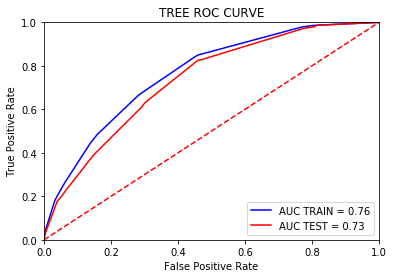

In [20]:
# Create ROC to test whether the model is good or not
plt.title('TREE ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label='AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'r', label='AUC TEST = %0.2f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [21]:
feature_cols = list(X.columns.values)
tree.export_graphviz(fm01_Tree, out_file='tree_f.txt', filled=True, rounded=True, feature_names= feature_cols, impurity=False, class_names=['Good','Bad'])

In [22]:
# Build function to get variables that are deemed important by the decision tree
def getTreeVars(TREE, varNames):
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else 'undefined' for i in tree_.feature]
    
    nameSet = set()
    for i in tree_.feature:
        if i in tree_.feature:
            nameSet.add(i)
    nameList = list(nameSet)
    parameter_list = list()
    for i in nameList:
        parameter_list.append(varNames[i])
    return parameter_list

In [23]:
# Call function with the tree model we built and the feature columns
vars_tree_flag = getTreeVars(fm01_Tree, feature_cols)

In [24]:
for i in vars_tree_flag:
    print(i)

KIDSDRIV
TRAVTIME
NPOLICY
OLDCLAIM
IMP_INCOME
MVR_PTS
IMP_HOME_VAL
y_EDU_2
z_PARENT1_Yes
z_REVOKED_Yes
z_URBANICITY_Highly Urban/ Urban
M_CAR_AGE


In [25]:
#----------------------------------------------------------------------------------------------
# THE START OF LECTURE 4: Decision Trees for Regression Models to predict continuous variables
#----------------------------------------------------------------------------------------------

In [26]:
# The tilde revereses the true/false, if it was false it would say true but we want it to say false
F = ~ Y_train[TARGET_A].isna()
w_train = X_train[F] #select only the true people and put it into w_train
z_train = Y_train[F]
F1 = ~ Y_test[TARGET_A].isna()
w_test = X_test[F1] #select only the true people and put it into w_train
z_test = Y_test[F1]

In [27]:
z_train.head().T

,8190,9650,3570,8103,6072
TARGET_CLM_AMT,3158.0,5125.0,2927.0,4566.0,2327.0
TARGET_CLM_FLAG,1.0,1.0,1.0,1.0,1.0


In [28]:
F[0:5]

9298    False
4549    False
3085    False
8190     True
2023    False
Name: TARGET_CLM_AMT, dtype: bool

In [29]:
w_train.head().T

,8190,9650,3570,8103,6072
KIDSDRIV,0.0,1.0,0.0,0.0,0.0
HOMEKIDS,4.0,2.0,0.0,0.0,1.0
TRAVTIME,41.0,43.0,44.0,24.0,18.0
BLUEBOOK,15050.0,6400.0,12820.0,14980.0,21620.0
TIF,1.0,13.0,1.0,4.0,9.0
NPOLICY,1.0,4.0,1.0,2.0,4.0
OLDCLAIM,3246.0,0.0,0.0,0.0,6259.0
CLM_FREQ,2.0,0.0,0.0,0.0,1.0
MVR_PTS,1.0,1.0,6.0,0.0,3.0
y_EDU_4,0.0,0.0,0.0,0.0,0.0


In [30]:
# Building our Damage regression tree
amt_m01_tree = tree.DecisionTreeRegressor(max_depth=3)
amt_m01_tree = amt_m01_tree.fit(w_train, z_train[TARGET_A])

In [31]:
# Predict the damages assuming the person does crash their car
z_pred_train = amt_m01_tree.predict(w_train)
z_pred_test = amt_m01_tree.predict(w_test)

In [32]:
# Calculate means squarred error since we know the real value and the predicted value
# Take the square root to get the root squared means error
RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(z_train[TARGET_A], z_pred_train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(z_test[TARGET_A], z_pred_test))

In [33]:
print('TREE RMSE Train: ', RMSE_TRAIN)
print('TREE RMSE Test: ', RMSE_TEST)

TREE RMSE Train:  7817.645557807273
TREE RMSE Test:  6935.040231706725


In [34]:
# Save the error of the tree
RMSE_TREE = RMSE_TEST

In [35]:
feature_cols = list(X.columns.values)
vars_tree_amt = getTreeVars(amt_m01_tree, feature_cols)
tree.export_graphviz(amt_m01_tree, out_file='tree_a.txt', filled=True, rounded=True,feature_names=feature_cols, impurity=False, precision=0)

In [36]:
for i in vars_tree_amt:
    print(i)

y_EDU_4
IMP_AGE
BLUEBOOK
M_CAR_AGE


In [37]:
#-------------------------------------------
# THE START OF LECTURE 5: Handling Outliers
#-------------------------------------------
# If target variables has outliers, there could be issues

In [38]:
F = ~ Y_train[TARGET_A].isna()
w_train = X_train[F].copy() #select only the true people and put it into w_train
z_train = Y_train[F].copy()
F1 = ~ Y_test[TARGET_A].isna()
w_test = X_test[F1].copy() #select only the true people and put it into w_test
z_test = Y_test[F1].copy()

In [39]:
# look at the mean and max, huge discrepancy
z_train.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET_CLM_AMT,2195.0,5701.100683,7979.063159,59.0,2613.0,4083.0,5727.5,123247.0
TARGET_CLM_FLAG,2195.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [40]:
# look at the mean and max, huge discrepancy
z_test.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET_CLM_AMT,551.0,5544.738657,6817.690173,30.0,2748.0,4255.0,5734.5,77907.0
TARGET_CLM_FLAG,551.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [41]:
F = z_train[ TARGET_A ] > 25000
z_train.loc[F, TARGET_A] = 25000

F = z_test[ TARGET_A ] > 25000
z_test.loc[F, TARGET_A] = 25000

In [42]:
print(z_train.describe().T)
print(z_test.describe().T)

                  count         mean          std   min     25%     50%  \
TARGET_CLM_AMT   2195.0  5169.959453  4781.400149  59.0  2613.0  4083.0   
TARGET_CLM_FLAG  2195.0     1.000000     0.000000   1.0     1.0     1.0   

                    75%      max  
TARGET_CLM_AMT   5727.5  25000.0  
TARGET_CLM_FLAG     1.0      1.0  
                 count         mean          std   min     25%     50%  \
TARGET_CLM_AMT   551.0  5160.413793  4584.761764  30.0  2748.0  4255.0   
TARGET_CLM_FLAG  551.0     1.000000     0.000000   1.0     1.0     1.0   

                    75%      max  
TARGET_CLM_AMT   5734.5  25000.0  
TARGET_CLM_FLAG     1.0      1.0  


In [43]:
#-------------------------------------------
# THE START OF LECTURE 6: Random Forest
#-------------------------------------------

## Random Forest
* We develop a bunch of trees with different random sample data sets from our test data
* We develop lots of decision trees then 'take a vote' to find the best one
* Basically a 'majority rules' 

## Gradient Boosting
* Gradient boosting builds short and shallow trees
* It builds multiple iterations of trees, each time weighing the records that are incorrectly classified greater
in order to fix our mistakes
* Repeats this cycle until a combined classifier is derived
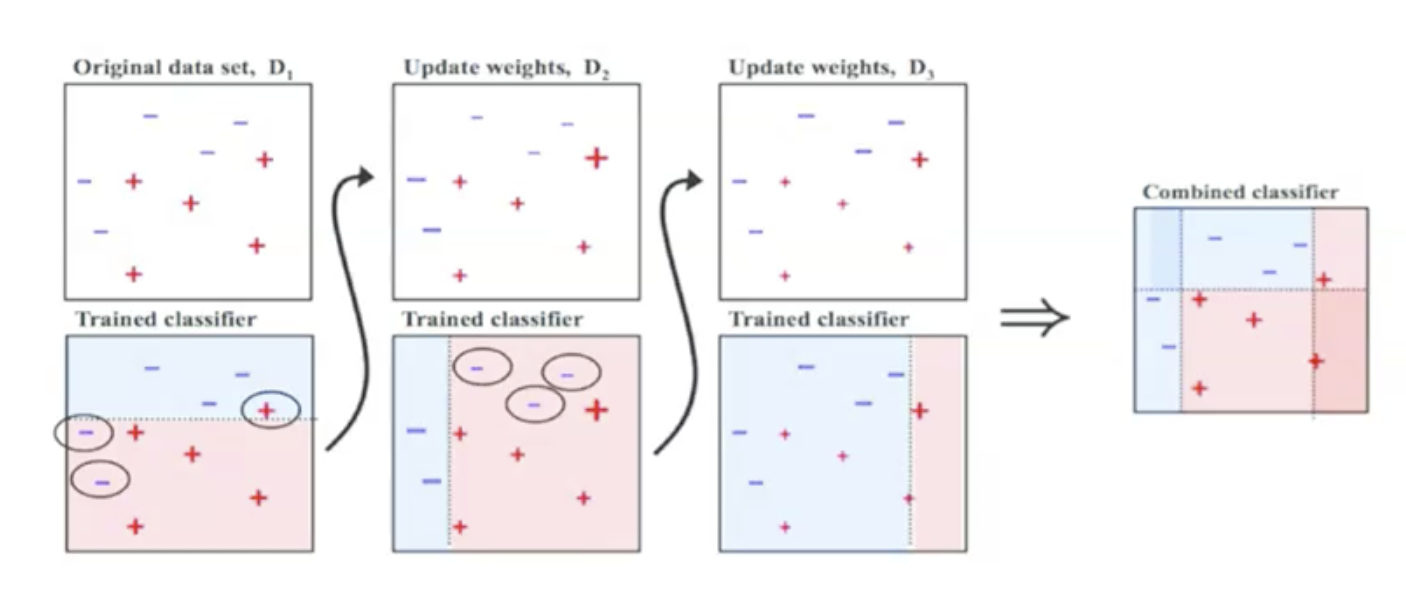

## Advantages of complex trees
* Easy to use
* Highly accurate
* Immune to outliers
* Immune to missing values (depending on the software)

## Disadvantages of complex trees
* Not easy to interpret (can't print them out)
* Not easy to deploy
* Might not be legal to use in some cases since they are 'black bloxes'

In [44]:
from operator import itemgetter
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [45]:
# create 100 random trees, random_state allows us to create repeatable experiments, always starts in the same place
fm01_RF = RandomForestClassifier(n_estimators=100, random_state = 1)
fm01_RF = fm01_RF.fit(X_train, Y_train[TARGET_F])

In [46]:
# Predict whether a person crashed their car on training and test data set
Y_Pred_train = fm01_RF.predict(X_train)
Y_Pred_test = fm01_RF.predict(X_test)

In [47]:
print("Random Forest\n")
print("Probablitity of crash")
print("Accuracy of Training Data:", metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy of Test Data:", metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n")

Random Forest

Probablitity of crash
Accuracy of Training Data: 1.0
Accuracy of Test Data: 0.7792333818534692




In [48]:
# Create ROC metrics for random forest
# Predict probablity scores for those who crash their cars
# Grab false positive and true positive rates
probs = fm01_RF.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_RF.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test



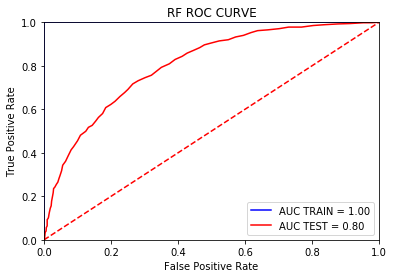

In [49]:
plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [50]:
# This will pull the feature importance from our tree and 
## only keep the variables where their important is above average
def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

In [51]:
feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( fm01_RF, feature_cols )

for i in vars_RF_flag :
   print( i )

('BLUEBOOK', 100)
('IMP_INCOME', 96)
('TRAVTIME', 91)
('IMP_AGE', 89)
('OLDCLAIM', 86)
('IMP_HOME_VAL', 79)
('MVR_PTS', 68)
('IMP_CAR_AGE', 58)
('IMP_YOJ', 57)
('TIF', 55)
('z_URBANICITY_Highly Urban/ Urban', 52)
('CLM_FREQ', 41)
('NPOLICY', 32)
('HOMEKIDS', 31)


In [52]:
# lets build a model that is going to predict damage cost
amt_m01_RF = RandomForestRegressor(n_estimators=100, random_state=1)
amt_m01_RF = amt_m01_RF.fit(w_train, z_train[TARGET_A])


In [53]:
Z_Pred_train = amt_m01_RF.predict(w_train)
Z_Pred_test = amt_m01_RF.predict(w_test)

In [54]:
RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(z_test[TARGET_A], Z_Pred_test))

RMSE_RF = RMSE_TEST

In [55]:
print("RF RMSE TRAIN:", RMSE_TRAIN)
print("RF RMSE TEST:", RMSE_TEST)

RF RMSE TRAIN: 1851.6060453258528
RF RMSE TEST: 4646.303434505601


In [56]:
feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( amt_m01_RF, feature_cols )

for i in vars_RF_flag :
   print( i )

('BLUEBOOK', 100)
('TRAVTIME', 63)
('IMP_INCOME', 58)
('IMP_AGE', 57)
('OLDCLAIM', 47)
('IMP_HOME_VAL', 40)
('IMP_YOJ', 33)
('IMP_CAR_AGE', 31)
('MVR_PTS', 31)
('TIF', 27)
('NPOLICY', 19)
('CLM_FREQ', 17)
('HOMEKIDS', 17)


In [57]:
#-------------------------------------------
# THE START OF LECTURE 6: Gradient Boosting
#-------------------------------------------

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

In [59]:
# create 100 random trees, random_state allows us to create repeatable experiments, always starts in the same place
fm01_GB = GradientBoostingClassifier(n_estimators=100, random_state = 1)
fm01_GB = fm01_GB.fit(X_train, Y_train[TARGET_F])

In [60]:
Y_Pred_train = fm01_GB.predict(X_train)
Y_Pred_test = fm01_GB.predict(X_test)

In [61]:
print("Gradient Boosting\n")
print("Probablitity of crash")
print("Accuracy of Training Data:", metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy of Test Data:", metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n")

Gradient Boosting

Probablitity of crash
Accuracy of Training Data: 0.8142215750515714
Accuracy of Test Data: 0.7942746239689471




In [62]:
# Create ROC metrics for random forest
# Predict probablity scores for those who crash their cars
# Grab false positive and true positive rates
probs = fm01_GB.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_GB.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test

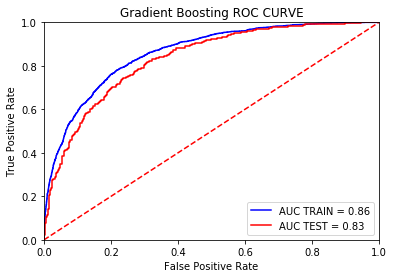

In [63]:
plt.title('Gradient Boosting ROC CURVE')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC TRAIN = %0.2f' % roc_auc_train)
plt.plot(fpr_test, tpr_test, 'b', label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [64]:
feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( fm01_GB, feature_cols )

for i in vars_RF_flag :
   print( i )

('OLDCLAIM', 100)
('z_URBANICITY_Highly Urban/ Urban', 82)
('y_EDU_2', 39)
('z_CAR_USE_Private', 34)
('KIDSDRIV', 29)
('MVR_PTS', 26)
('BLUEBOOK', 26)
('IMP_HOME_VAL', 25)
('IMP_INCOME', 24)
('IMP_AGE', 24)
('z_REVOKED_Yes', 22)
('z_PARENT1_Yes', 20)
('TRAVTIME', 20)
('z_IMP_JOB_Manager', 15)


In [65]:
# lets build a model that is going to predict damage cost
amt_m01_GB = RandomForestRegressor(n_estimators=100, random_state=1)
amt_m01_GB = amt_m01_GB.fit(w_train, z_train[TARGET_A])


In [66]:
Z_Pred_train = amt_m01_GB.predict(w_train)
Z_Pred_test = amt_m01_GB.predict(w_test)

In [67]:
RMSE_TRAIN = math.sqrt(metrics.mean_squared_error(z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt(metrics.mean_squared_error(z_test[TARGET_A], Z_Pred_test))

In [68]:
print("GB RMSE TRAIN:", RMSE_TRAIN)
print("GB RMSE TEST:", RMSE_TEST)

RMSE_GB = RMSE_TEST

GB RMSE TRAIN: 1851.6060453258528
GB RMSE TEST: 4646.303434505601


In [69]:
feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( amt_m01_GB, feature_cols )

for i in vars_RF_flag :
   print( i )

('BLUEBOOK', 100)
('TRAVTIME', 63)
('IMP_INCOME', 58)
('IMP_AGE', 57)
('OLDCLAIM', 47)
('IMP_HOME_VAL', 40)
('IMP_YOJ', 33)
('IMP_CAR_AGE', 31)
('MVR_PTS', 31)
('TIF', 27)
('NPOLICY', 19)
('CLM_FREQ', 17)
('HOMEKIDS', 17)


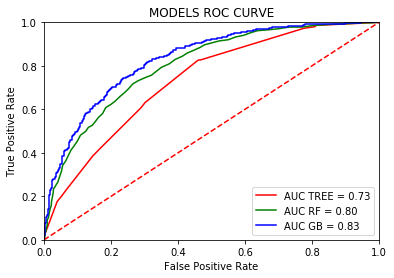

Root Mean Square Average For Damages
TREE 6935.040231706725
RF 4646.303434505601
GB 4646.303434505601


In [70]:
# BUILD A FINAL ROC CURVE OF ALL THREE MODELS TO COMPARE THEM
plt.title('MODELS ROC CURVE')
plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC TREE = %0.2f' % auc_tree, color="red")
plt.plot(fpr_RF, tpr_RF, 'b', label = 'AUC RF = %0.2f' % auc_RF, color="green")
plt.plot(fpr_GB, tpr_GB, 'b', label = 'AUC GB = %0.2f' % auc_GB, color="blue")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



print("Root Mean Square Average For Damages")
print("TREE", RMSE_TREE)
print("RF", RMSE_RF)
print("GB", RMSE_GB)